<h3>Importing the libraries</h3>

In [38]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import geopandas as gpd
%matplotlib inline
import plotly.plotly as py

In [2]:
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

<h3>Importing the csv and loading the data frame</h3>

In [3]:
url=r'C:\Users\shikh\Desktop\Exercise_1.csv'
data = pd.read_csv(url)

In [4]:
data.head()

,Date,District,Type of Event,Question and Remarks
0,20180802.0,ALLAHABAD,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...
1,20180512.0,SIDDHARTH NAGAR,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...
2,20180614.0,AMBEDKAR NAGAR,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...
3,20180605.0,SIDDHARTH NAGAR,ATTEMPTED MURDER,Q: Can we take your valuable feedback on you...
4,20180808.0,GONDA,DOMESTIC VIOLENCE,Q: Can we take your valuable feedback on you...


In [5]:
df = pd.DataFrame(data)
df = df.iloc[0:200]

<h3>Breaking up the Question and Remarks column into seperate colums.</h3>

In [6]:
qna = df["Question and Remarks"].tolist()
broken = []
for i in range(200):
    broken.append(re.split('Q:|Ans:|Comment:|Remark:',qna[i]))
    

In [7]:
broken[1]

['  ',
 ' Can we take your valuable feedback on your registered event with UP100 P12051805390?\xa0\xa0\xa0',
 ' YES    ',
 ' Are you satisfied with the immediate relief provided to address your issue?\xa0\xa0\xa0',
 ' Not Satisfied    ',
 ' Please select the reason\xa0\xa0\xa0',
 ' No action taken by Police Station staff.    ',
 ' Do you want to share any additional feedback?\xa0\xa0\xa0',
 ' -1    ',
 ' ',
 '    ',
 ' ',
 ' Caller Police Station gaye lekin unki koi bhi sahayta nahi kari gai. caller ko shak hai police ne ghoos liya hai kyoki caller call karke batata hai muzrim yaha hai paKADIYE par police kuch nahi karti hai ...   ']

In [8]:
remark_col = []
comments_col = []
col_1 = []
col_2 = []
col_3 = []
#col_4 is needed only if the length of an entry is 13. not needed in case of length 11
col_4 = []
for i in range(200):
    broken[i][0] = len(broken[i])
    remark_col.append(broken[i][-1])
    comments_col.append(broken[i][-3])
    col_1.append(broken[i][2])
    col_2.append(broken[i][4])
    col_3.append(broken[i][6])
    if broken[i][0] == 13:
        col_4.append(broken[i][8])
    else:
        col_4.append("NA")
        

In [9]:
df['Can_We_Take_Feedback'] = col_1
df['satisfaction'] = col_2
df['Reason_for_unsat'] = col_3
df['Additional_feedback'] = col_4
df['remark']=remark_col
df['comments']=comments_col
df.head()

,Date,District,Type of Event,Question and Remarks,Can_We_Take_Feedback,satisfaction,Reason_for_unsat,Additional_feedback,remark,comments
0,20180802.0,ALLAHABAD,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...,YES,Not Satisfied,No action taken by Police Station staff.,NO,caller santust nahi hai thane ki police vipak...,
1,20180512.0,SIDDHARTH NAGAR,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...,YES,Not Satisfied,No action taken by Police Station staff.,-1,Caller Police Station gaye lekin unki koi bhi...,
2,20180614.0,AMBEDKAR NAGAR,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...,YES,Not Satisfied,No action taken by Police Station staff.,NO,Caller Police Station gaye lekin unki koi bhi...,
3,20180605.0,SIDDHARTH NAGAR,ATTEMPTED MURDER,Q: Can we take your valuable feedback on you...,YES,Not Satisfied,Others,NA,,
4,20180808.0,GONDA,DOMESTIC VIOLENCE,Q: Can we take your valuable feedback on you...,YES,Not Satisfied,Others,NA,,


<h1>Analyzing the Data</h1>

<h5>Looking at the type of events</h5>

In [10]:
freq = df['Type of Event'].value_counts().reindex(index=None)
freq_df=freq.rename_axis('Type_of_Event').reset_index(name='frequency')
freq_df

,Type_of_Event,frequency
0,ACCIDENT,122
1,DOMESTIC VIOLENCE,24
2,FEMALE HARRASSMENT,11
3,THEFT,10
4,THREAT IN PERSON,6
5,ATTEMPTED MURDER,6
6,ENCROACHMENT,3
7,ABSCOND FROM CUSTODY,3
8,GAMBLING,2
9,ROBBERY,2


In [11]:
freq_df.iplot(kind='pie',labels='Type_of_Event',values='frequency')

<h5>District Wise Cases</h5>

In [12]:
fp = "UP_shape/uttarpradesh_district.shp"

#reading the file stored in variable fp
map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe

map_df.head()

,DT_CEN_CD,ST_CEN_CD,censuscode,district,state,unique_id,geometry
0,15,9,146,Agra,Uttar Pradesh,15,"POLYGON ((77.64748400000001 27.242251, 77.6503..."
1,19,9,150,Bareilly,Uttar Pradesh,20,"POLYGON ((78.971249 28.421907, 78.98309 28.435..."
2,70,9,201,Etah,Uttar Pradesh,17,"POLYGON ((79.219089 27.576993, 79.229055 27.56..."
3,21,9,152,Shahjahanpur,Uttar Pradesh,22,"POLYGON ((80.316013 28.46029, 80.321928 28.454..."
4,20,9,151,Pilibhit,Uttar Pradesh,21,"POLYGON ((79.684729 28.849987, 79.693552 28.84..."


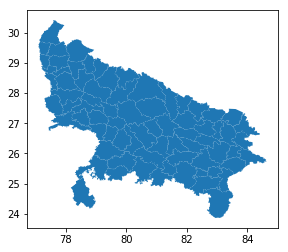

In [13]:
#preview the shapefile
map_df.plot()

In [14]:
#Extracting District wise case count from original data frame
district_count = df['District'].value_counts().reindex(index=None) # type series
freq_dist = district_count.rename_axis('district').reset_index(name='no_of_cases')
freq_dist = freq_dist.sort_values(by=['district'])
freq_dist = freq_dist.reset_index(drop=True)

In [15]:
map_df['district'] = map_df['district'].str.upper()
map_df = map_df.sort_values(by=['district'])
map_df = map_df.reset_index(drop=True)


In [16]:
merged = map_df.set_index('district').join(freq_dist.set_index('district'))

In [17]:
merged = merged.fillna(0)
merged.head()

,DT_CEN_CD,ST_CEN_CD,censuscode,state,unique_id,geometry,no_of_cases
district,,,,,,,
AGRA,15,9,146,Uttar Pradesh,15,"POLYGON ((77.64748400000001 27.242251, 77.6503...",8.0
ALIGARH,12,9,143,Uttar Pradesh,12,"POLYGON ((77.510501 27.926842, 77.506929 27.93...",1.0
ALLAHABAD,44,9,175,Uttar Pradesh,45,"POLYGON ((81.54209 25.185582, 81.541742 25.187...",9.0
AMBEDKAR NAGAR,47,9,178,Uttar Pradesh,48,"POLYGON ((82.22024999999999 26.408923, 82.2227...",3.0
AMETHI,NA,9,NA,Uttar Pradesh,72,"POLYGON ((81.346538 26.543837, 81.353065 26.54...",3.0


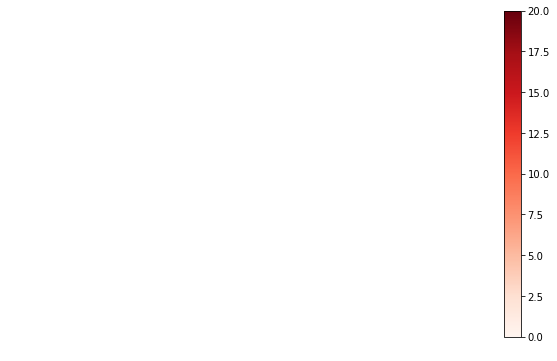

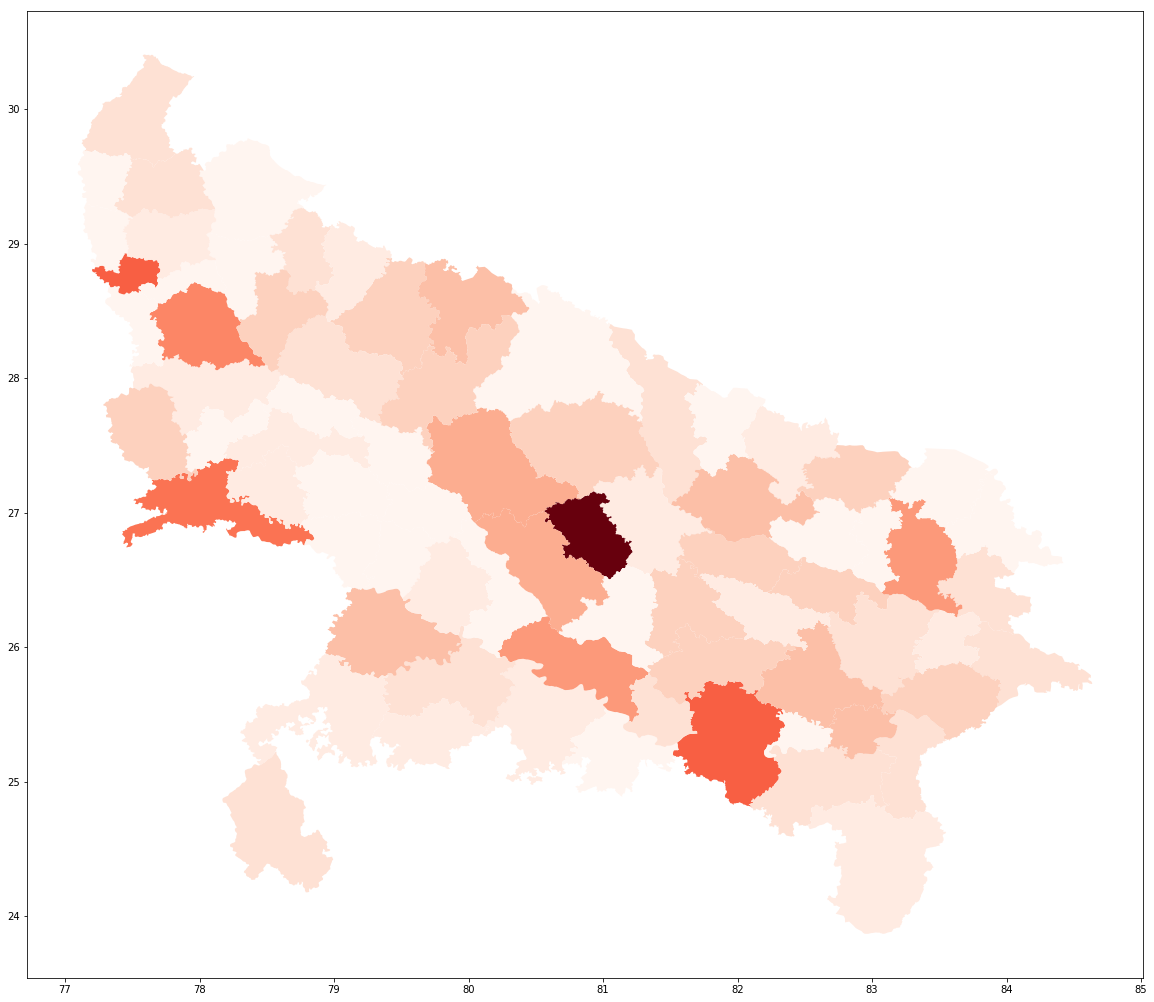

In [18]:
fig2, ax = plt.subplots(1, figsize=(10, 6))
fig1 = merged.plot(column='no_of_cases',cmap='Reds',figsize=(20,20))
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=20))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig2.colorbar(sm)

<h5>Events by Day of the week</h5>

In [22]:
df['Date'] = df['Date'].astype(int)
df['Date'] = df['Date'].astype(str)
df.info()
df.shape
df['Date'] = df['Date'].str[:4] + '-' + df['Date'].str[4:6] + '-' + df['Date'].str[6:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
Date                    200 non-null object
District                200 non-null object
Type of Event           200 non-null object
Question and Remarks    200 non-null object
Can_We_Take_Feedback    200 non-null object
satisfaction            200 non-null object
Reason_for_unsat        200 non-null object
Additional_feedback     200 non-null object
remark                  200 non-null object
comments                200 non-null object
dtypes: object(10)
memory usage: 15.7+ KB


In [23]:
df['Date'] = df['Date'].str[:] + " 01:00:00"

In [28]:
df['Date'] = pd.to_datetime(df['Date'])

In [29]:
df.head()

,Date,District,Type of Event,Question and Remarks,Can_We_Take_Feedback,satisfaction,Reason_for_unsat,Additional_feedback,remark,comments
0,2018-08-02 01:00:00,ALLAHABAD,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...,YES,Not Satisfied,No action taken by Police Station staff.,NO,caller santust nahi hai thane ki police vipak...,
1,2018-05-12 01:00:00,SIDDHARTH NAGAR,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...,YES,Not Satisfied,No action taken by Police Station staff.,-1,Caller Police Station gaye lekin unki koi bhi...,
2,2018-06-14 01:00:00,AMBEDKAR NAGAR,ABSCOND FROM CUSTODY,Q: Can we take your valuable feedback on you...,YES,Not Satisfied,No action taken by Police Station staff.,NO,Caller Police Station gaye lekin unki koi bhi...,
3,2018-06-05 01:00:00,SIDDHARTH NAGAR,ATTEMPTED MURDER,Q: Can we take your valuable feedback on you...,YES,Not Satisfied,Others,NA,,
4,2018-08-08 01:00:00,GONDA,DOMESTIC VIOLENCE,Q: Can we take your valuable feedback on you...,YES,Not Satisfied,Others,NA,,


In [44]:
df['weekday'] = df['Date'].dt.dayofweek
weekday_count = df['weekday'].value_counts()
weekday_count


3    42
2    41
1    34
4    29
6    20
0    18
5    16
Name: weekday, dtype: int64

In [47]:
weekday_count.iplot(kind='bar')